In [29]:
%matplotlib inline
import sys
sys.path.append("../")

from law import read_experiments, parse_results, fit, optimize
import numpy as np
from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict, Trial, TrialType
from typing import List
import random
import matplotlib.pyplot as plt

In [30]:

def vis_experiments(experiments: List[Experiment]):
    col_width = 8
    col_height = 6
    fig, ax = plt.subplots(1, len(experiments), figsize=(col_width * len(experiments), col_height ))

    for i, experiment in enumerate(experiments):
        vis_experiment(experiment, ax[i])

def vis_experiment(experiment: Experiment, ax: plt.Axes):
    trial0 = experiment.trials[0]
    assert len(trial0.true_mixing_weights.values()) == 2, "Only 2D experiments supported"
    domain1 = list(trial0.true_mixing_weights.keys())[0]
    domain2 = list(trial0.true_mixing_weights.keys())[1]
    name = f"{domain1} vs {domain2}"

    vals = [trial.weighted_val_perplexity for trial in experiment.trials]
    xs = [list(trial.true_mixing_weights.values())[0] for trial in experiment.trials]

    ax.plot(xs, vals, '-o')
    ax.set_title(name)
    ax.set_xlabel(domain1)
    ax.set_ylabel("Weighted Val Perplexity")


    

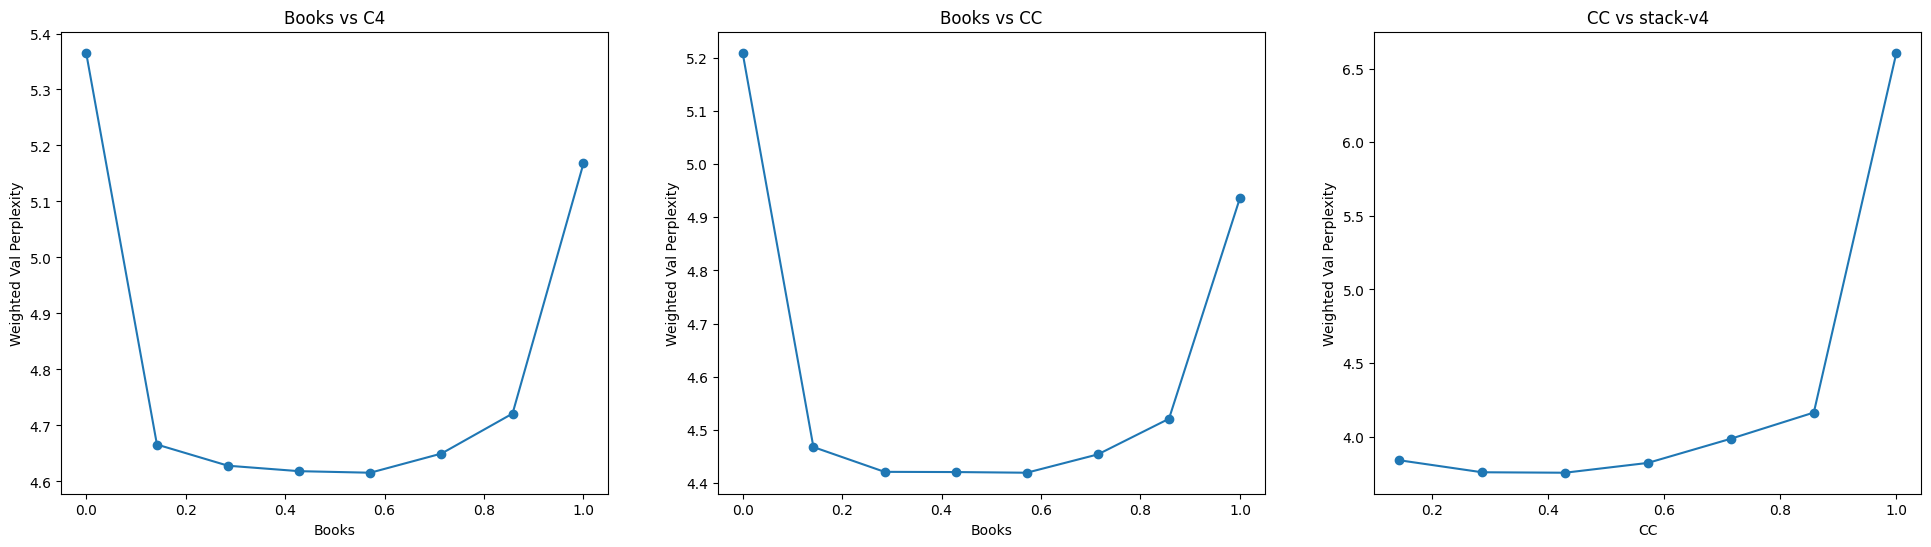

In [31]:
paths = [
    "/root/code/mixture_optimization/logs/lin_interp_books_c4_0/experiment_history.yaml",
    "/root/code/mixture_optimization/logs/lin_interp_books_cc_0/experiment_history.yaml",
    "/root/code/mixture_optimization/logs/lin_interp_cc_stack_0/experiment_history.yaml"
]

experiments = [read_experiments(path)[0] for path in paths]

vis_experiments(experiments)